In [15]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import seaborn as sns
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [16]:
paths=[]
labels=[]
for dirname,_,filenames in os.walk('C:\\Users\\dhaya\\nullclass\\TESS Toronto emotional speech set data\\'):
    for file in filenames:
        paths.append(os.path.join(dirname,file))
        label=file.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())

In [17]:
paths[:5]

['C:\\Users\\dhaya\\nullclass\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\dhaya\\nullclass\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\dhaya\\nullclass\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\dhaya\\nullclass\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\dhaya\\nullclass\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [18]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [19]:
data = pd.DataFrame()
data['speech']=paths
data['label']=labels

In [20]:
data.head()

,speech,label
0,C:\Users\dhaya\nullclass\TESS Toronto emotiona...,angry
1,C:\Users\dhaya\nullclass\TESS Toronto emotiona...,angry
2,C:\Users\dhaya\nullclass\TESS Toronto emotiona...,angry
3,C:\Users\dhaya\nullclass\TESS Toronto emotiona...,angry
4,C:\Users\dhaya\nullclass\TESS Toronto emotiona...,angry


In [21]:
data.label.value_counts()

label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

    Eda

<Axes: xlabel='label', ylabel='count'>

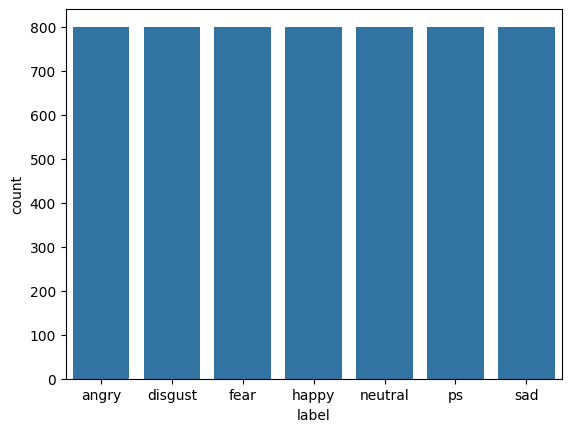

In [22]:
sns.countplot(data=data,x='label')

In [23]:
def waweplot(data, sr, emotion):
    plt.figure(figsize=(20,10))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [24]:
def spectogram(data, sr, emotion):
    x= librosa.stft(data)
    xdb= librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(20,10))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [37]:
emotion='fear'
path= data.loc[data['label']==emotion,'speech'].iloc[0]
d, sampling_rate= librosa.load(path)

In [39]:
sampling_rate

22050

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

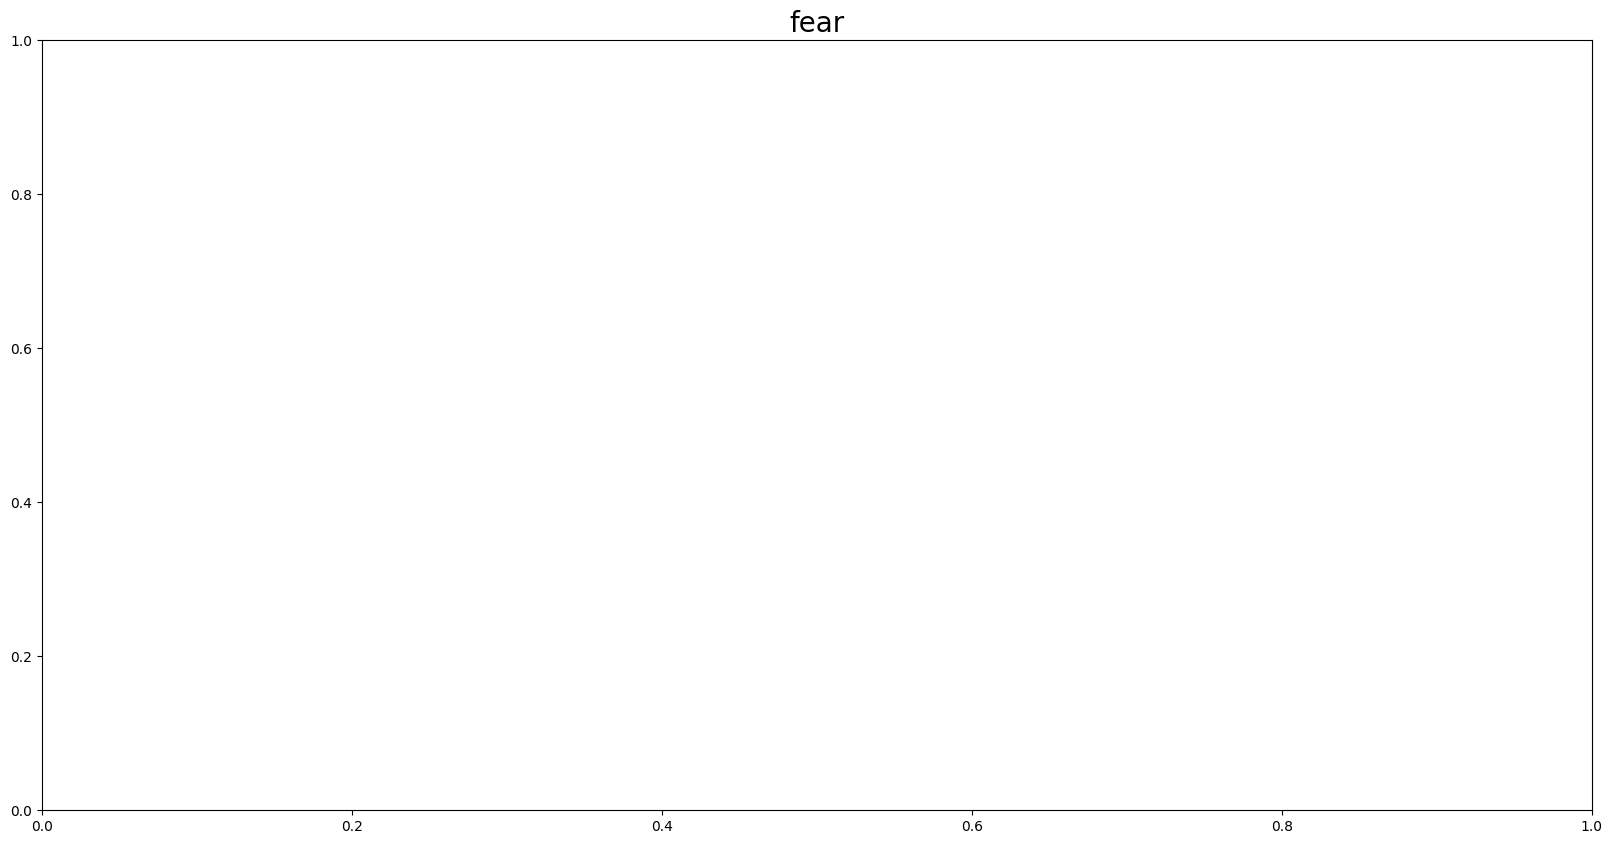

In [38]:
waweplot(d,sampling_rate, emotion)

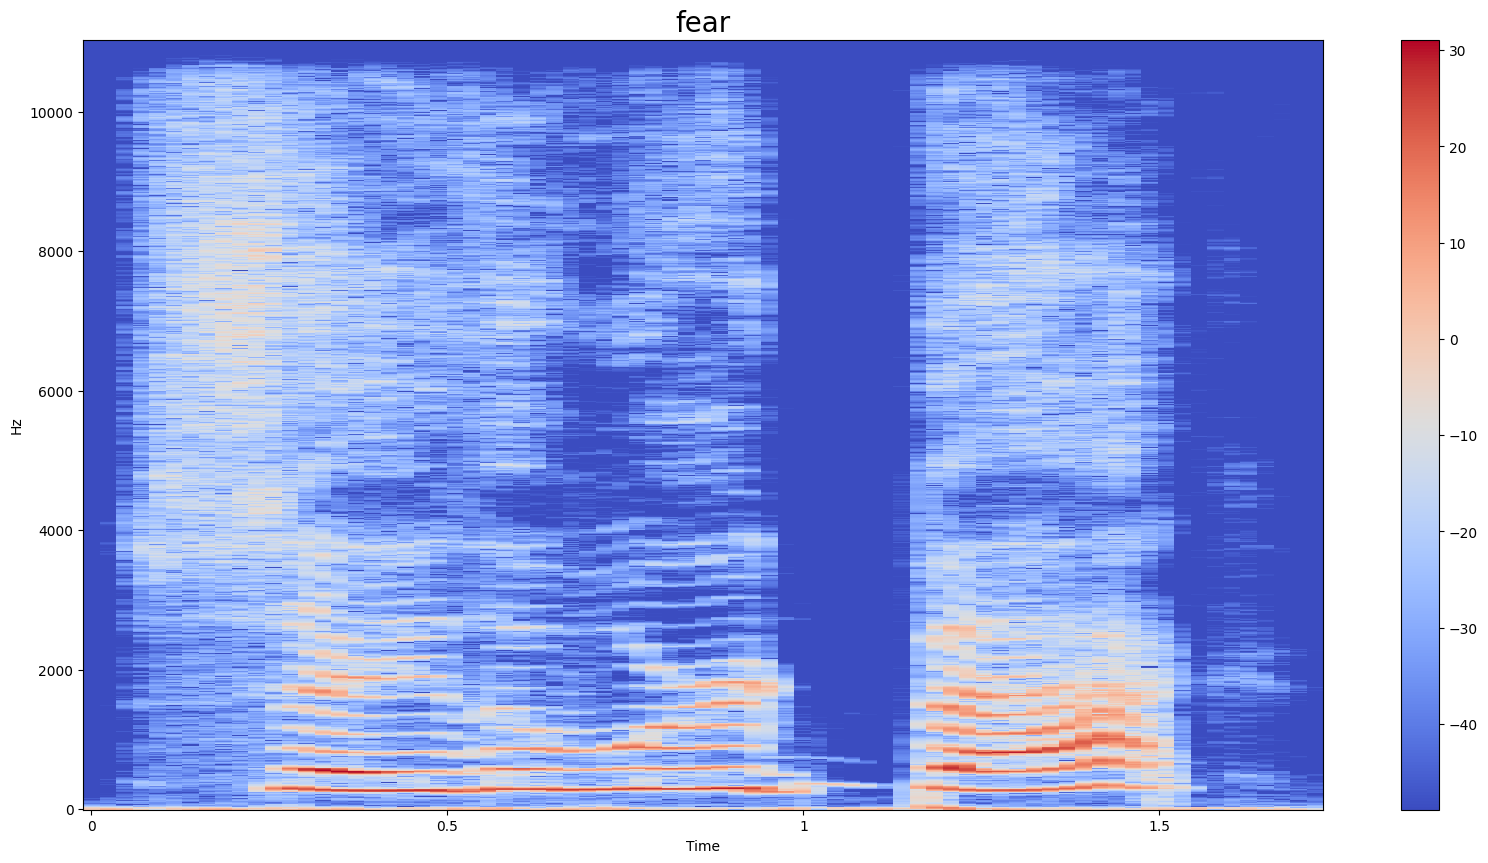

In [40]:
spectogram(d,sampling_rate,emotion)

In [41]:
Audio(path)

In [42]:
emotion='angry'
# print(data)
path= np.array(data.loc[data['label']==emotion,'speech'])[0]
d2, sampling_rate= librosa.load(path)

In [43]:
Audio(path)

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

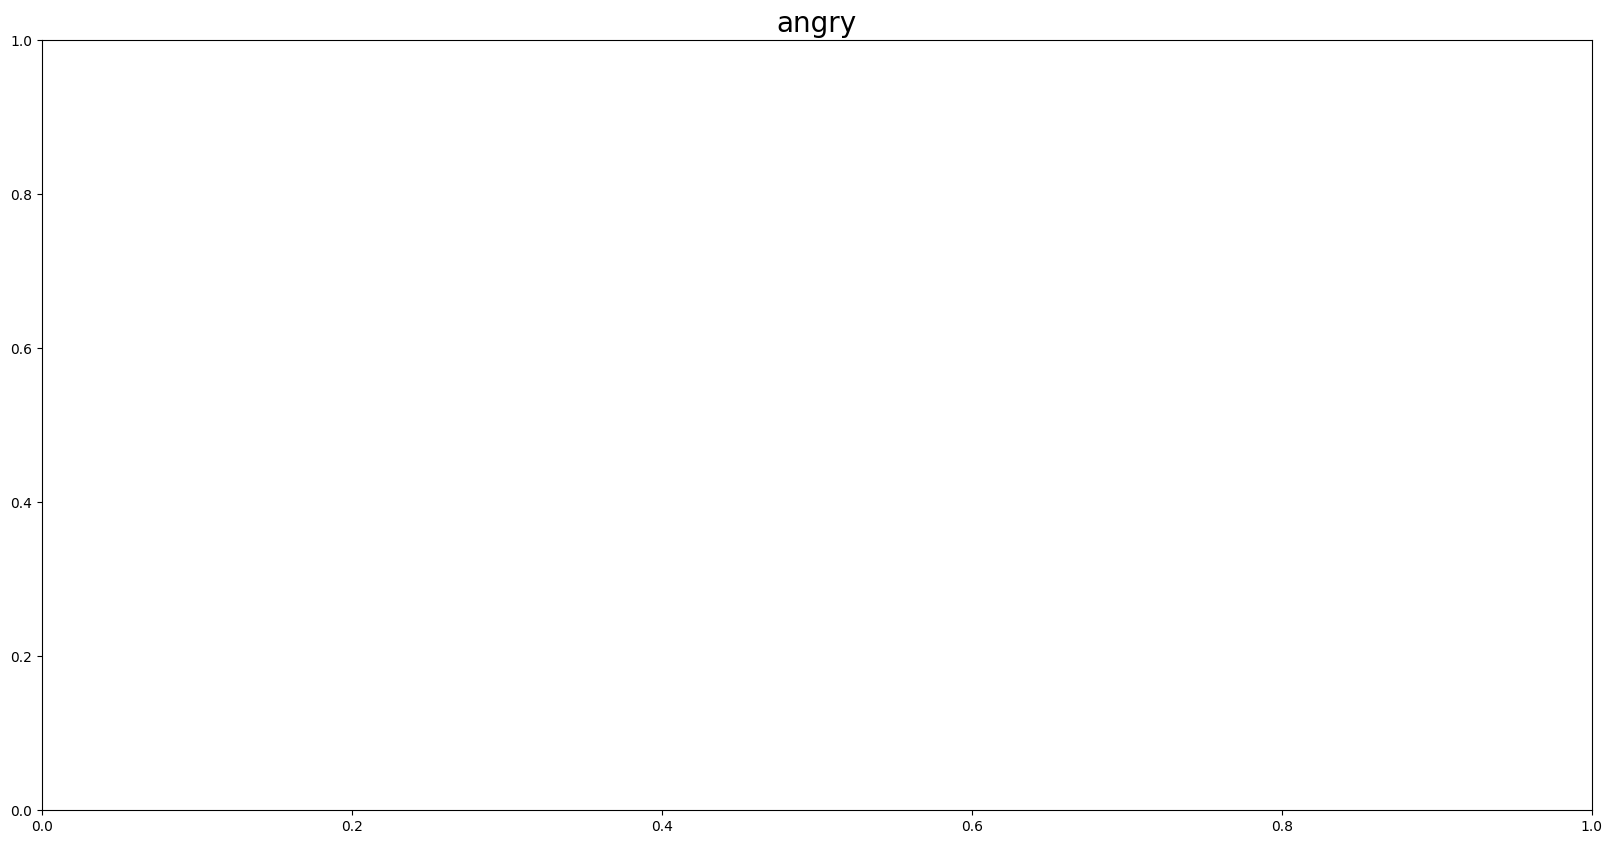

In [44]:
waweplot(d2, sampling_rate,emotion)

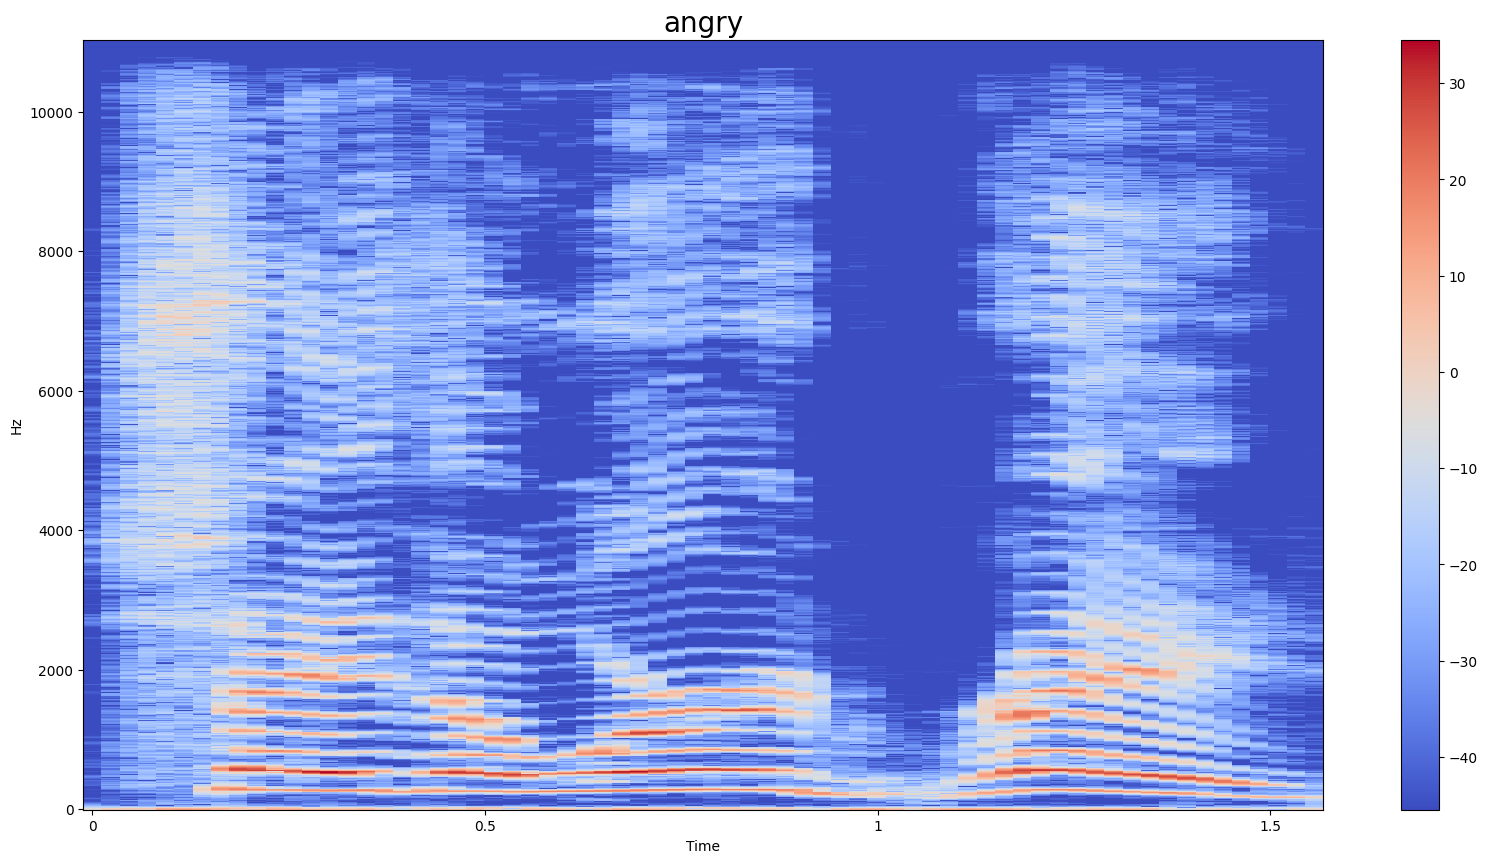

In [149]:
spectogram(d2,sampling_rate,emotion)

In [45]:
def extract_mfcc(filename):
    y, sr= librosa.load(filename, duration=3,offset=0.5)
    mfcc= np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [46]:
extract_mfcc(data['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666927e+01,
       -2.11275601e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57366073e-01, -1.83255327e+00,  2.02101663e-01,
        7.27551162e-01,  1.31773746e+00,  2.88633752e+00,  2.85579062e+00,
       -4.71292210e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126190e+00, -1.79688025e+00, -7.03765249e+00,  9.43658352e+00,
        8.35585403e+00,  2.17123604e+01,  1.92169914e+01,  2.03489285e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722193e-01,  5.11131525e+00,
        9.56873894e+00,  5.45486879e+00,  2.50996351e+00, -1.82390785e+00,
        4.86896276e+00,  9.31392384e+00,  2.08914971e+00, -1.90649164e+00],
      dtype=float32)

In [47]:
X_mfcc= data['speech'].apply(lambda x: extract_mfcc(x))

In [48]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666693, -...
1       [-465.73267, 98.77373, 0.65600884, -32.74544, ...
2       [-429.79196, 46.12401, 1.5550481, -0.21709459,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54756, 24.800041, 43.04809, 4...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.90637, 28.373262, 39.57707, -2....
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5600, dtype: object

In [49]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [50]:
X= np.expand_dims(X,-1)

In [51]:
X.shape

(5600, 40, 1)

In [52]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(data[['label']])

In [53]:
y = y.toarray()

In [54]:
y.shape

(5600, 7)

create models

In [55]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [56]:
model= Sequential([
                   LSTM(123,return_sequences=False, input_shape=(40,1)),
                   Dense(64, activation='relu'),
                   Dropout(0.2),
                   Dense(32, activation='relu'),
                   Dropout(0.2),
                   Dense(7, activation='softmax')
                  ])

In [57]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 71747 

In [59]:
history = model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512)

Epoch 1/100


9/9 [==============================] - 6s 289ms/step - loss: 1.8391 - accuracy: 0.2708 - val_loss: 1.7169 - val_accuracy: 0.4384
Epoch 2/100
9/9 [==============================] - 1s 166ms/step - loss: 1.5801 - accuracy: 0.3906 - val_loss: 1.4435 - val_accuracy: 0.4857
Epoch 3/100
9/9 [==============================] - 2s 210ms/step - loss: 1.2818 - accuracy: 0.5165 - val_loss: 1.0409 - val_accuracy: 0.5759
Epoch 4/100
9/9 [==============================] - 2s 199ms/step - loss: 0.9463 - accuracy: 0.6511 - val_loss: 0.8576 - val_accuracy: 0.5241
Epoch 5/100
9/9 [==============================] - 2s 214ms/step - loss: 0.7108 - accuracy: 0.7272 - val_loss: 0.5063 - val_accuracy: 0.7866
Epoch 6/100
9/9 [==============================] - 2s 190ms/step - loss: 0.5601 - accuracy: 0.7969 - val_loss: 0.4006 - val_accuracy: 0.8536
Epoch 7/100
9/9 [==============================] - 2s 182ms/step - loss: 0.4273 - accuracy: 0.8509 - val_loss: 0.2357 - val_accuracy: 0.9357
Epoch 8/100

In [60]:

checkpoint= tf.keras.callbacks.ModelCheckpoint('model_weights_voice.h5',monitor='val_accuracy',save_weights_only=True,mode='max',verbose=1)
callbacks= [checkpoint]


In [62]:
history = model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,callbacks=[checkpoint])

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 1: saving model to model_weights_voice.h5
9/9 [==============================] - 1s 137ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.1488e-04 - val_accuracy: 1.0000
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9993
Epoch 2: saving model to model_weights_voice.h5
9/9 [==============================] - 2s 178ms/step - loss: 0.0015 - accuracy: 0.9993 - val_loss: 1.0397e-04 - val_accuracy: 1.0000
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998
Epoch 3: saving model to model_weights_voice.h5
9/9 [==============================] - 2s 199ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 1.0095e-04 - val_accuracy: 1.0000
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 4: saving model to model_weights_voice.h5
9/9 [==============================] 

In [63]:
# saving model
model_json = model.to_json()
with open('model_a_voice.json','w') as json_file:
    json_file.write(model_json)